In [2]:
num_points = 500
rs = LinRange(0, 1, num_points)
θs = LinRange(0, 2π, num_points)
pairs = [(r, θ) for r in rs for θ in θs]
xs = [pair[1] * cos(pair[2]) for pair in pairs]
ys = [pair[1] * sin(pair[2]) for pair in pairs]
xs = LinRange(-1, 1, num_points)
ys = LinRange(-1, 1, num_points)
function f(x, y; scale=1)
    r = sqrt(x^2 + y^2)
    if r1 < r < r2
        1*scale
    else
        0
    end
end
interionic_spacing = .2
up_modifier = sqrt(3)/2 * interionic_spacing
over_modifer = 1/2 * interionic_spacing
points_inside_circle = []
digits = 2
radius = 1
function gen_points(pt, points_inside_circle, x, y)
    pt = [round(pt[1], digits=digits), round(pt[2], digits=digits)]
    if pt in points_inside_circle || pt[1]^2 + pt[2]^2 > radius^2
        return
    else
        push!(points_inside_circle, pt)
        push!(x, pt[1])
        push!(y, pt[2])
        gen_points([pt[1] + over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] - interionic_spacing, pt[2]], points_inside_circle, x, y)
        return points_inside_circle, x, y
    end
end
pairs, x, y = gen_points([0, 0], [], [], [])
function circleShape(h, k, r)
    θ = LinRange(0, 2*π, 500)
    h .+ r*sin.(θ), k .+ r*cos.(θ)
end


# r1 = .45
# r2 = .55
# decay = .01

r1 = .45
r2 = .55
decay = .1
function annulus(ρ, θ)
    mid = r1 + .5  * (r2 - r1)
    max = (-1/(1 + exp(-1/decay*(mid-r2))) +   1/(1 + exp(-1/decay*(mid-r1))))
    ((-1/(1 + exp(-1/decay*(ρ-r2))) +   1/(1 + exp(-1/decay*(ρ-r1)))))/max
end
function R(n::Int64, m::Int64, ρ::Float64)
    if (n - m) % 2 != 0
        0
    else
        function summand(k)
            n = big(n)
            k = big(k)
            (-1)^k * factorial(n-k)/(factorial(k)*factorial(Int((n+m)/2) - k)*factorial(Int((n-m)/2) - k))*(ρ)^(n-2*k)
        end
        mapreduce(summand, +, Array(range(0, stop=Int((n-m)/2), step=1)))
    end
end

function Z(n, m, ρ, θ)
    if m < 0
        R(n, abs(m), ρ) * sin(abs(m) * θ)
    else
        R(n, m, ρ) * cos(m * θ)
    end
end
function integrand(n, m)
    function rtn(coor)
        ρ = coor[1]
        θ = coor[2]
        x = ρ * cos(θ)
        y = ρ * sin(θ)
        Z(n, m, ρ, θ) * annulus(ρ, θ) * ρ
    end
    rtn
end
using Cubature
function cond_eval(n, m)
    if -n ≤ m ≤ n
        (2*n+2)/(π*2) * hcubature(integrand(n, m), [0., 0.], [1., 2*π], maxevals=10000)[1]
    else
        0
    end
end
max_n = 20
data = [cond_eval(i, 0) for i in range(0, max_n, step=1)]
function recon(ρ, ϕ)
    t = 0
    for (n, el) in enumerate(data)
        t += el*Z(n-1,0,ρ, 0)
    end
    t
end
function sample_across_unit_disk(f, discretization)
    x = y = Array(range(-1, 1, length=discretization))
    z = Array{typeof(f(0.,0.))}(UndefInitializer(), length(x), length(y))
    for (i, xx) in enumerate(x)
        for (j, yy) in enumerate(y)
            if xx^2 + yy^2 > 1
                if typeof(f(0.,0.)) == Tuple{Float64,Float64}
                    z[i, j] = (0.,0.)
                else
                    z[i, j] = 0.
                end
            else
                ρ = sqrt(xx^2 + yy^2)
                ϕ = atan(yy, xx)                
                res = f(ρ, ϕ)
                z[i, j] = res
            end
        end
    end
    x, y, z
end
num_points = 500
xx, yy, samples =  sample_across_unit_disk(recon, num_points)
xx, yy, samples2 =  sample_across_unit_disk(annulus, num_points)
num_points = 500
rs = LinRange(0, 1, num_points)
θs = LinRange(0, 2π, num_points)
pairs = [(r, θ) for r in rs for θ in θs]
xs = [pair[1] * cos(pair[2]) for pair in pairs]
ys = [pair[1] * sin(pair[2]) for pair in pairs]
xs = LinRange(-1, 1, num_points)
ys = LinRange(-1, 1, num_points)
function f(x, y; scale=1)
    r = sqrt(x^2 + y^2)
    if r1 < r < r2
        1*scale
    else
        0
    end
end
interionic_spacing = .2
up_modifier = sqrt(3)/2 * interionic_spacing
over_modifer = 1/2 * interionic_spacing
points_inside_circle = []
digits = 2
radius = 1
function gen_points(pt, points_inside_circle, x, y)
    pt = [round(pt[1], digits=digits), round(pt[2], digits=digits)]
    if pt in points_inside_circle || pt[1]^2 + pt[2]^2 > radius^2
        return
    else
        push!(points_inside_circle, pt)
        push!(x, pt[1])
        push!(y, pt[2])
        gen_points([pt[1] + over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] - interionic_spacing, pt[2]], points_inside_circle, x, y)
        return points_inside_circle, x, y
    end
end
pairs, x, y = gen_points([0, 0], [], [], [])
function circleShape(h, k, r)
    θ = LinRange(0, 2*π, 500)
    h .+ r*sin.(θ), k .+ r*cos.(θ)
end

# using Plots
# gr() # We will continue onward using the GR backend
# plot(heatmap(xs, ys, f, alpha=.1; c=palette([:white, :blue], 2)))
# plot!(x, y, seriestype = :scatter, title = "Top View of Penning Trap", legend=false, fillalpha=.2, aspect_ratio = 1, axis=nothing, border=:none)

#plot!(arcshape(0,2π), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=.2, aspect_ratio = 1, axis=nothing, border=:none)
using SpecialFunctions
using QuantumOptics

function fidelity(ρ, σ)
    ρ = ρ/norm(ρ)
    σ = σ/norm(σ)
    abs(conj(transpose(ρ))*σ)^2
end

function R(n::Int64, m::Int64, ρ::Float64)
    if (n - m) % 2 != 0
        0
    else
        function summand(k)
            n = big(n)
            k = big(k)
            (-1)^k * factorial(n-k)/(factorial(k)*factorial(Int((n+m)/2) - k)*factorial(Int((n-m)/2) - k))*(ρ)^(n-2*k)
        end
        mapreduce(summand, +, Array(range(0, stop=Int((n-m)/2), step=1)))
    end
end

function unpack_zernike(zernike_coefficients_even, zernike_coefficients_odd, ρ, ω, t)
    Pevens = []
    eventuples = []
    for (m, zeven) in enumerate(zernike_coefficients_even)
        meven = m - 1
        push!(Pevens, [zeven[i] * R(i-1, meven, ρ) for i in Array(range(1, length(zeven), step=1))])
    end
    for i in range(1, length(Pevens), step=1)
        rotationeven = - (i - 1) * ω * t
        total = sum(Pevens[i])
        push!(eventuples, (i - 1, total, rotationeven))
    end
    eventuples # No odd tuples, so we'll leave it simple. (In fact, only m=0 again but we'll test this.)
end

toarray(s::Union{Set, Array}) = [toarray.(s)...]
toarray(v::Number) = v
ω = 2*π*180E3
θ = 0.;
b = SpinBasis(1//2)
ψ0 = 1/sqrt(2) * (spindown(b) + spinup(b))
scale = 1
zernikeeven = []
zernikeodd = []
amp = .3
μ = 0
order =  0
U = BigFloat(2 * π * 10E3)

function infidelity_across_disk(F1, F2)
    function infidelity_polar(ρ, ϕ)
        ψ1 = F1(ρ, ϕ).data
        ψ2 = F2(ρ, ϕ).data
        infid = 1 - real(fidelity(ψ1, ψ2))
    return infid, ψ1, ψ2
    end
end

function across_disk(F1)
    function infidelity_polar(ρ, ϕ)
        ψ1 = F1(ρ, ϕ).data
    return ψ1
    end
end

function annulus_spin_profile(ρ, ϕ)
    ψ0 = 1/sqrt(2) * (spindown(b) + spinup(b))
    H(t, _) = annulus(ρ, ϕ) * sigmaz(b)
    evolution_time = step_size = π/2
    T = [0.0:step_size:evolution_time;];
    _, ψ = timeevolution.schroedinger_dynamic(T, ψ0, H)
    last(ψ)
end

function evolution_evaluator_factory(ψ0, zernikeeven, zernikeodd, U, ψ, μ, ω, b)
    function evaluator(ρ, ϕ)
        evolution_time = π/(2*U*amp)
        step_size = evolution_time/1
        T = [0.0:step_size:evolution_time;];
        H(t, _) = H_odf(ρ, ϕ, t, zernikeeven, zernikeodd, U, ψ, μ, ω)*sigmaz(b)
        _, ψTARGET = timeevolution.schroedinger_dynamic(T, ψ0, H)
        last(ψTARGET)
    end
end

function H_odf(ρ, ϕ, t, zernike_recon, U, ψ, order1, order2, ω)
    total = 0
    if abs(order1) ≤ order2
        if order1 == 0
            total += amp*data[order2+1] * Z(order2, 0, ρ, ϕ-ω*t)
        else
            print("BAD")
        end
    end
    U * sin(-abs(order1)*ω*t + total)
end
function plot_triangles_across_unit_disk(f, x, y)
    infids = []
    ψ1s = []
    ψ2s = []
    for (i, xx) in enumerate(x)
        print(i)
        ρ = sqrt(xx^2 + y[i]^2)
        ϕ = atan(y[i], xx)
        infid, ψ1, ψ2 = f(ρ, ϕ)
        push!(infids, infid)
        push!(ψ1s, ψ1)
        push!(ψ2s, ψ2)
        end
    infids, ψ1s, ψ2s
end
function sequential_exact_evolution_evaluator_factory(ψ0, maxm, U, θ, ω, b)
    """Apply all the zernike coefficients given, in order, for time T each."""
    orders = range(-maxm, maxm, step=1)
    function evaluator(ρ, ϕ)
        ψ = ψ0
        evolution_time = π/(2*U*amp)
        step_size = evolution_time/1
        T = [0.0:step_size:evolution_time;];
        for order1 in orders
            for order2 in range(0, max_n, step=1)
                H(t, _) = H_odf(ρ, ϕ, t, 0, U, θ, order1, order2, ω)*sigmaz(b)
                _, ψ = timeevolution.schroedinger_dynamic(T, ψ, H; maxiters=1e10)
                ψ = last(ψ)
            end
        end
        ψ
    end
end
max_order = 0
sequential_exact_evolution = sequential_exact_evolution_evaluator_factory(ψ0, max_order, U, θ, ω, b)
exact_evolution_evaluator = evolution_evaluator_factory(ψ0, zernikeeven, [], U, θ, 0., ω, b)
infid, annulus_vals, exact = plot_triangles_across_unit_disk(infidelity_across_disk(annulus_spin_profile, sequential_exact_evolution), x, y);

12345678910111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091

In [12]:
num_points = 500
rs = LinRange(0, 1, num_points)
θs = LinRange(0, 2π, num_points)
pairs = [(r, θ) for r in rs for θ in θs]
xs = [pair[1] * cos(pair[2]) for pair in pairs]
ys = [pair[1] * sin(pair[2]) for pair in pairs]
xs = LinRange(-1, 1, num_points)
ys = LinRange(-1, 1, num_points)
function f(x, y; scale=1)
    r = sqrt(x^2 + y^2)
    if r1 < r < r2
        1*scale
    else
        0
    end
end
interionic_spacing = .2
up_modifier = sqrt(3)/2 * interionic_spacing
over_modifer = 1/2 * interionic_spacing
points_inside_circle = []
digits = 2
radius = 1
function gen_points(pt, points_inside_circle, x, y)
    pt = [round(pt[1], digits=digits), round(pt[2], digits=digits)]
    if pt in points_inside_circle || pt[1]^2 + pt[2]^2 > radius^2
        return
    else
        push!(points_inside_circle, pt)
        push!(x, pt[1])
        push!(y, pt[2])
        gen_points([pt[1] + over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] - interionic_spacing, pt[2]], points_inside_circle, x, y)
        return points_inside_circle, x, y
    end
end
pairs, x, y = gen_points([0, 0], [], [], [])
function circleShape(h, k, r)
    θ = LinRange(0, 2*π, 500)
    h .+ r*sin.(θ), k .+ r*cos.(θ)
end


# r1 = .45
# r2 = .55
# decay = .01

r1 = .45
r2 = .55
decay = .1
function annulus(ρ, θ)
    mid = r1 + .5  * (r2 - r1)
    max = (-1/(1 + exp(-1/decay*(mid-r2))) +   1/(1 + exp(-1/decay*(mid-r1))))
    ((-1/(1 + exp(-1/decay*(ρ-r2))) +   1/(1 + exp(-1/decay*(ρ-r1)))))/max
end
function R(n::Int64, m::Int64, ρ::Float64)
    if (n - m) % 2 != 0
        0
    else
        function summand(k)
            n = big(n)
            k = big(k)
            (-1)^k * factorial(n-k)/(factorial(k)*factorial(Int((n+m)/2) - k)*factorial(Int((n-m)/2) - k))*(ρ)^(n-2*k)
        end
        mapreduce(summand, +, Array(range(0, stop=Int((n-m)/2), step=1)))
    end
end

function Z(n, m, ρ, θ)
    if m < 0
        R(n, abs(m), ρ) * sin(abs(m) * θ)
    else
        R(n, m, ρ) * cos(m * θ)
    end
end
function integrand(n, m)
    function rtn(coor)
        ρ = coor[1]
        θ = coor[2]
        x = ρ * cos(θ)
        y = ρ * sin(θ)
        Z(n, m, ρ, θ) * annulus(ρ, θ) * ρ
    end
    rtn
end
using Cubature
function cond_eval(n, m)
    if -n ≤ m ≤ n
        (2*n+2)/(π*2) * hcubature(integrand(n, m), [0., 0.], [1., 2*π], maxevals=10000)[1]
    else
        0
    end
end
max_n = 15
data = [cond_eval(i, 0) for i in range(0, max_n, step=1)]
function recon(ρ, ϕ)
    t = 0
    for (n, el) in enumerate(data)
        t += el*Z(n-1,0,ρ, 0)
    end
    t
end
function sample_across_unit_disk(f, discretization)
    x = y = Array(range(-1, 1, length=discretization))
    z = Array{typeof(f(0.,0.))}(UndefInitializer(), length(x), length(y))
    for (i, xx) in enumerate(x)
        for (j, yy) in enumerate(y)
            if xx^2 + yy^2 > 1
                if typeof(f(0.,0.)) == Tuple{Float64,Float64}
                    z[i, j] = (0.,0.)
                else
                    z[i, j] = 0.
                end
            else
                ρ = sqrt(xx^2 + yy^2)
                ϕ = atan(yy, xx)                
                res = f(ρ, ϕ)
                z[i, j] = res
            end
        end
    end
    x, y, z
end
num_points = 500
xx, yy, samples =  sample_across_unit_disk(recon, num_points)
xx, yy, samples2 =  sample_across_unit_disk(annulus, num_points)
num_points = 500
rs = LinRange(0, 1, num_points)
θs = LinRange(0, 2π, num_points)
pairs = [(r, θ) for r in rs for θ in θs]
xs = [pair[1] * cos(pair[2]) for pair in pairs]
ys = [pair[1] * sin(pair[2]) for pair in pairs]
xs = LinRange(-1, 1, num_points)
ys = LinRange(-1, 1, num_points)
function f(x, y; scale=1)
    r = sqrt(x^2 + y^2)
    if r1 < r < r2
        1*scale
    else
        0
    end
end
interionic_spacing = .2
up_modifier = sqrt(3)/2 * interionic_spacing
over_modifer = 1/2 * interionic_spacing
points_inside_circle = []
digits = 2
radius = 1
function gen_points(pt, points_inside_circle, x, y)
    pt = [round(pt[1], digits=digits), round(pt[2], digits=digits)]
    if pt in points_inside_circle || pt[1]^2 + pt[2]^2 > radius^2
        return
    else
        push!(points_inside_circle, pt)
        push!(x, pt[1])
        push!(y, pt[2])
        gen_points([pt[1] + over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] - interionic_spacing, pt[2]], points_inside_circle, x, y)
        return points_inside_circle, x, y
    end
end
pairs, x, y = gen_points([0, 0], [], [], [])
function circleShape(h, k, r)
    θ = LinRange(0, 2*π, 500)
    h .+ r*sin.(θ), k .+ r*cos.(θ)
end

# using Plots
# gr() # We will continue onward using the GR backend
# plot(heatmap(xs, ys, f, alpha=.1; c=palette([:white, :blue], 2)))
# plot!(x, y, seriestype = :scatter, title = "Top View of Penning Trap", legend=false, fillalpha=.2, aspect_ratio = 1, axis=nothing, border=:none)

#plot!(arcshape(0,2π), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=.2, aspect_ratio = 1, axis=nothing, border=:none)
using SpecialFunctions
using QuantumOptics

function fidelity(ρ, σ)
    ρ = ρ/norm(ρ)
    σ = σ/norm(σ)
    abs(conj(transpose(ρ))*σ)^2
end

function R(n::Int64, m::Int64, ρ::Float64)
    if (n - m) % 2 != 0
        0
    else
        function summand(k)
            n = big(n)
            k = big(k)
            (-1)^k * factorial(n-k)/(factorial(k)*factorial(Int((n+m)/2) - k)*factorial(Int((n-m)/2) - k))*(ρ)^(n-2*k)
        end
        mapreduce(summand, +, Array(range(0, stop=Int((n-m)/2), step=1)))
    end
end

function unpack_zernike(zernike_coefficients_even, zernike_coefficients_odd, ρ, ω, t)
    Pevens = []
    eventuples = []
    for (m, zeven) in enumerate(zernike_coefficients_even)
        meven = m - 1
        push!(Pevens, [zeven[i] * R(i-1, meven, ρ) for i in Array(range(1, length(zeven), step=1))])
    end
    for i in range(1, length(Pevens), step=1)
        rotationeven = - (i - 1) * ω * t
        total = sum(Pevens[i])
        push!(eventuples, (i - 1, total, rotationeven))
    end
    eventuples # No odd tuples, so we'll leave it simple. (In fact, only m=0 again but we'll test this.)
end

toarray(s::Union{Set, Array}) = [toarray.(s)...]
toarray(v::Number) = v
ω = 2*π*180E3
θ = 0.;
b = SpinBasis(1//2)
ψ0 = 1/sqrt(2) * (spindown(b) + spinup(b))
scale = 1
zernikeeven = []
zernikeodd = []
amp = .3
μ = 0
order =  0
U = BigFloat(2 * π * 10E3)

function infidelity_across_disk(F1, F2)
    function infidelity_polar(ρ, ϕ)
        ψ1 = F1(ρ, ϕ).data
        ψ2 = F2(ρ, ϕ).data
        infid = 1 - real(fidelity(ψ1, ψ2))
    return infid, ψ1, ψ2
    end
end

function across_disk(F1)
    function infidelity_polar(ρ, ϕ)
        ψ1 = F1(ρ, ϕ).data
    return ψ1
    end
end

function annulus_spin_profile(ρ, ϕ)
    ψ0 = 1/sqrt(2) * (spindown(b) + spinup(b))
    H(t, _) = annulus(ρ, ϕ) * sigmaz(b)
    evolution_time = step_size = π/2
    T = [0.0:step_size:evolution_time;];
    _, ψ = timeevolution.schroedinger_dynamic(T, ψ0, H)
    last(ψ)
end

function evolution_evaluator_factory(ψ0, zernikeeven, zernikeodd, U, ψ, μ, ω, b)
    function evaluator(ρ, ϕ)
        evolution_time = π/(2*U*amp)
        step_size = evolution_time/1
        T = [0.0:step_size:evolution_time;];
        H(t, _) = H_odf(ρ, ϕ, t, zernikeeven, zernikeodd, U, ψ, μ, ω)*sigmaz(b)
        _, ψTARGET = timeevolution.schroedinger_dynamic(T, ψ0, H)
        last(ψTARGET)
    end
end

function H_odf(ρ, ϕ, t, zernike_recon, U, ψ, order1, order2, ω)
    total = 0
    if abs(order1) ≤ order2
        if order1 == 0
            total += amp*data[order2+1] * Z(order2, 0, ρ, ϕ-ω*t)
        else
            print("BAD")
        end
    end
    U * sin(-abs(order1)*ω*t + total)
end
function plot_triangles_across_unit_disk(f, x, y)
    infids = []
    ψ1s = []
    ψ2s = []
    for (i, xx) in enumerate(x)
        print(i)
        ρ = sqrt(xx^2 + y[i]^2)
        ϕ = atan(y[i], xx)
        infid, ψ1, ψ2 = f(ρ, ϕ)
        push!(infids, infid)
        push!(ψ1s, ψ1)
        push!(ψ2s, ψ2)
        end
    infids, ψ1s, ψ2s
end
ω = 2*π*180E3
θ = 0.;
b = SpinBasis(1//2)
ψ0 = 1/sqrt(2) * (spindown(b) + spinup(b))
scale = 1
zernikeeven = []
zernikeodd = []
amp = .3
μ = 0
order =  0
U = BigFloat(2 * π * 10E3)

function infidelity_across_disk(F1, F2)
    function infidelity_polar(ρ, ϕ)
        ψ1 = F1(ρ, ϕ).data
        ψ2 = F2(ρ, ϕ).data
        infid = 1 - real(fidelity(ψ1, ψ2))
    return infid, ψ1, ψ2
    end
end

function across_disk(F1)
    function infidelity_polar(ρ, ϕ)
        ψ1 = F1(ρ, ϕ).data
    return ψ1
    end
end



function annulus_spin_profile(ρ, ϕ)
    ψ0 = 1/sqrt(2) * (spindown(b) + spinup(b))
    H(t, _) = annulus(ρ, ϕ) * sigmaz(b)
    evolution_time = step_size = π/2
    T = [0.0:step_size:evolution_time;];
    _, ψ = timeevolution.schroedinger_dynamic(T, ψ0, H)
    last(ψ)
end

function evolution_evaluator_factory(ψ0, zernikeeven, zernikeodd, U, ψ, μ, ω, b)
    function evaluator(ρ, ϕ)
        evolution_time = π/(2*U*amp)
        step_size = evolution_time/1
        T = [0.0:step_size:evolution_time;];
        H(t, _) = H_odf(ρ, ϕ, t, zernikeeven, zernikeodd, U, ψ, μ, ω)*sigmaz(b)
        _, ψTARGET = timeevolution.schroedinger_dynamic(T, ψ0, H)
        last(ψTARGET)
    end
end
function H_odf(ρ, ϕ, t, zernike_coefficients_even, zernike_coefficients_odd, U, ψ, μ, ω)
    U * sin(amp*recon(ρ, ϕ))
    #U * sin(amp*annulus(ρ, ϕ))
    
end

exact_evolution_evaluator = evolution_evaluator_factory(ψ0, zernikeeven, [], U, θ, 0., ω, b)
max_order = 0
infid2, annulus_vals, exact = plot_triangles_across_unit_disk(infidelity_across_disk(annulus_spin_profile, exact_evolution_evaluator), x, y);

12345678910111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091

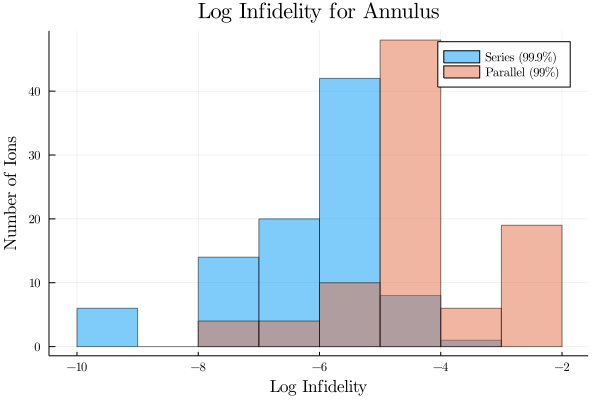

In [16]:
σ1 = .1
σ2 = .1  
using LaTeXStrings
using Plots

histogram(log.(10, infid), alpha=.5, label="Series (99.9%)", xlabel="Log Infidelity", ylabel="Number of Ions", title="Log Infidelity for Annulus",  fontfamily="Computer Modern")
#histogram!(log.(10, z2), alpha=.5, label="")
histogram!(log.(10, infid2), alpha=.5, label="Parallel (99%)")

In [15]:
1-maximum(infid2)

0.9911365054253659